In [169]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
#Import and parse the data into a manipulatable dataset aka df or dataframe
#xl = pd.ExcelFile("C:/Users/culle/Documents/Data/LAICPMS_Data/Kortyna_TO_30DISC_Rim_Core_2D_KDE_Test.xlsx")
xl = pd.ExcelFile("C:/Users/culle/Documents/Data/LAICPMS_Data/Kortyna_STX_30DISC_Rim_Core_2D_KDE_Test.xlsx")
df = xl.parse("ZrUPb")

#Perform any of below functions to see what's in the dataframe
df.columns #shows column headers

Index(['Unnamed: 0', 'Sample_ID_1', 'Grain_ID', 'Analysis_ID', 'U_ppm', 'U_Th',
       'Th_U', 'BestAge_Core', 'BestAge_err_Core', 'Disc', 'RimCore',
       'Unnamed: 11', 'Sample_ID', 'Grain_ID.1', 'Analysis_ID.1', 'U_ppm.1',
       'U_Th.1', 'Th_U.1', 'BestAge_Rim', 'BestAge_err_Rim', 'Disc.1',
       'RimCore.1'],
      dtype='object')

In [186]:
#Define the data of interest (x, y for Kernel Density Estimation and plotting; X_error, Y_error for plotting)
x = df['BestAge_Core']
y = df['BestAge_Rim']
X_error = df['BestAge_err_Core']
Y_error = df['BestAge_err_Rim']
#Sample_ID = df['Sample_ID_1']
xmin, xmax = 0, 3500
ymin, ymax = 0, 2000

In [187]:
#Perform the kernel density estimate on the data
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
#Note gaussian_kde uses normally distributed aka Gaussian kernels to perform the density estimation
#Also note that this works best for unimodal distributions; bimodal or multi-modal distributions tend to be oversmoothed
kernel.set_bandwidth(bw_method=0.15)
#bandwidth selection has the strongest influence on the resulting plot
#options include 'scott' which uses Scott's Rule, 'silverman' which uses Silverman's Rule, or a scalar value
#if no bandwidth is specified (i.e., the set_bandwidth is # out) then the estimation automatically uses Scott's Rule
Z = np.reshape(kernel(positions).T, xx.shape)

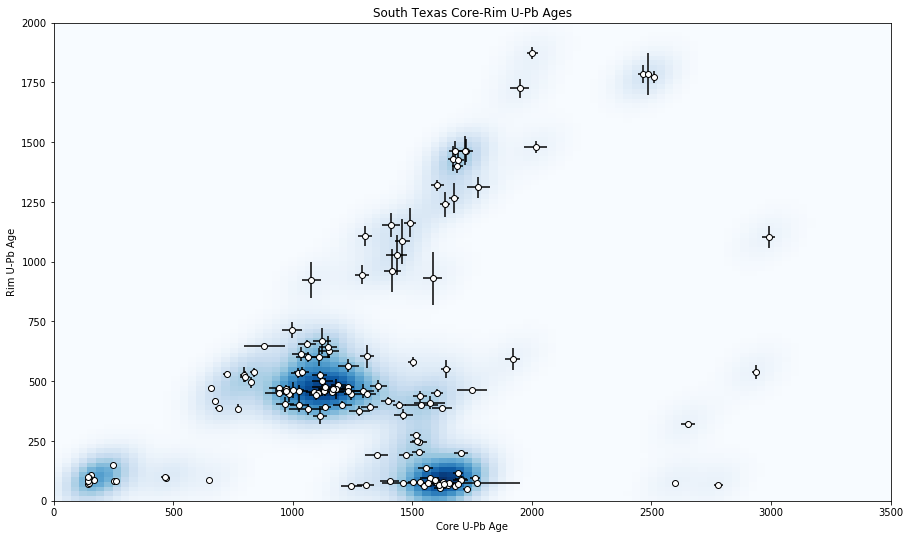

In [188]:
#Plot the Bivariate KDE

#Plot set-up
fig, ax = plt.subplots(figsize=(15, 10))
ax.errorbar(x, y, xerr=X_error, yerr=Y_error, linestyle="", color='black', capsize=0)
ax.plot(x, y, marker='o', markersize=6, markeredgewidth=1, markerfacecolor='White', markeredgecolor='Black', linestyle="")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#change xmin, xmax, ymin, ymax to set values to zoom in on specific part of plot
#ax.set_xlim(1250, 1750)
#ax.set_ylim(0, 250)

# Kernel density estimate plot instead of the contourf plot
ax.imshow(np.rot90(Z), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
#benefits of KDE plot is not biased by contour interval

# Contourf plot (instead of the kernel density estimate plot) - can look cleaner
#cfset = ax.contourf(xx, yy, Z, cmap='Blues')
# contourf(x values, y values, Z values, number of contour intervals - deleted for automatic determination, color map choice)

# Add contour lines if you wish
#cset = ax.contour(xx, yy, Z, colors='gray')

# Label plot
#ax.clabel(cset, inline=1, fontsize=10)
ax.set_title ("South Texas Core-Rim U-Pb Ages")
ax.set_xlabel('Core U-Pb Age')
ax.set_ylabel('Rim U-Pb Age')

plt.show()

In [140]:
import pathlib

In [141]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
fig.savefig('Output/STX_Bivariate_KDE_3.pdf')

In [ ]:
#This little bit of code takes a series of string names, and converts them to color values depending on the color map chosen equally spaced on a line between 0 and 1.
#cmap = plt.get_cmap('gist_rainbow')
#names = ["17STX-01","17STX-02","17STX-06","17STX-07","17STX-08","17STX-09","17STX-10","17STX-11","17STX-12","17STX-13","17STX-14","17STX-15","17STX-16","17STX-17","17STX-18","17STX-19","17STX-20","17STX-22","17STX-23"]
#colors = cmap(np.linspace(0, 1, len(names)))
#print(colors)